#BandMath & CloudMask
Las consultas se pueden realizar solicitando más de una variable(banda), es posible realizar operaciones sobre ellas.


In [1]:
%matplotlib inline
from datetime import  date
from pprint import pprint
from gdf import dt2secs, GDF 
from analytics import Analytics
from execution_engine import ExecutionEngine
from analytics_utils import plot

In [2]:
'''
Año inicial y final de la consulta, con los sensores LS5 y los datos de la máquina virtual
funciona 2010 y 2011
Con landsat 7 debería funcionar hasta el 2013, 
sin embargo al hacer la consulta sobre LS7ETMPQ las pruebas fallaron por rango inválido
'''
start_year=2010 #int(input("Ingrese el año inicial/ start year"))
end_year=2010 #int(input("Ingrese el año final/ end year"))

In [3]:
a = Analytics()
e = ExecutionEngine()

start_date = dt2secs(date(year=start_year,month=1,day=1))  #Start_year-01-01
end_date = dt2secs(date(year=end_year, month=12, day=31)) #End_year-12-31

dimensions = {'X': {'range': (147.0, 147.125)},
              'Y': {'range': (-36.0, -36 +0.125)},
              'T': {'range': (start_date, end_date)}
              }

'''
Debería funcionar con LS7ETM y LS7ETMPQ, 
sin embargo no conocemos los rángos válidos de fecha para el segundo sensor.
'''
arrays = a.createArray('LS5TM', ['B40','B30'], dimensions, 'bands_data') #B30: Banda 3, B40: Banda 4
pq_data = a.createArray('LS5TMPQ', ['PQ'], dimensions, 'pq_data') #PQ: Pixel Quality, Variable usada para el enmascaramiento 

DEBUG:analytics:Initialise Analytics Module.


Initialise Analytics Module.


INFO:gdf:Forcing refresh of all cached data


Forcing refresh of all cached data


INFO:gdf:Connected to databases ['landsat', 'modis']


Connected to databases ['landsat', 'modis']


INFO:gdf:Read storage configuration from databases ['LS8OLI', 'LS5TM', 'LS7ETM', 'LS5TMPQ', 'LS7ETMPQ', 'LS8OLIPQ']


Read storage configuration from databases ['LS8OLI', 'LS5TM', 'LS7ETM', 'LS5TMPQ', 'LS7ETMPQ', 'LS8OLIPQ']


DEBUG:execution_engine:Initialise Execution Module.


Initialise Execution Module.


INFO:gdf:Forcing refresh of all cached data


Forcing refresh of all cached data


INFO:gdf:Connected to databases ['landsat', 'modis']


Connected to databases ['landsat', 'modis']


INFO:gdf:Read storage configuration from databases ['LS8OLI', 'LS5TM', 'LS7ETM', 'LS5TMPQ', 'LS7ETMPQ', 'LS8OLIPQ']


Read storage configuration from databases ['LS8OLI', 'LS5TM', 'LS7ETM', 'LS5TMPQ', 'LS7ETMPQ', 'LS8OLIPQ']


DEBUG:analytics:storage_type = LS5TM


storage_type = LS5TM


DEBUG:analytics:variable = B40


variable = B40


DEBUG:analytics:variable = B30


variable = B30


DEBUG:analytics:storage_type = LS5TMPQ


storage_type = LS5TMPQ


DEBUG:analytics:variable = PQ


variable = PQ


In [4]:
##Operaciones entre bandas
ndvi = a.applyBandMath(arrays, '((array1 - array2) / (array1 + array2))', 'ndvi') #Normalized Difference Vegetation Index
##Enmascaramiento de nubes, usando la información sobre la calidad del pixel
mask = a.applyCloudMask(ndvi, pq_data, 'mask') #Enmascaramiento de nubes
#Reducción (mediana)
median_t = a.applyGenericReduction(mask, ['T'], 'median(array1)', 'medianT') #Reducción

DEBUG:analytics:function before = ((array1 - array2) / (array1 + array2))


function before = ((array1 - array2) / (array1 + array2))


DEBUG:analytics:function after = ((B40 - B30) / (B40 + B30))


function after = ((B40 - B30) / (B40 + B30))


DEBUG:analytics:function before = median(array1)


function before = median(array1)


DEBUG:analytics:function after = median(mask)


function after = median(mask)
{'mask': {'array_input': ['ndvi'],
          'array_mask': 'pq_data',
          'array_output': {'data_type': 'int16',
                           'dimensions': {'T': {'range': (1262304000,
                                                          1293753600)},
                                          'X': {'range': (147.0, 147.125)},
                                          'Y': {'range': (-36.0, -35.875)}},
                           'dimensions_order': ['T', 'Y', 'X'],
                           'no_data_value': -999.0,
                           'shape': (17, 500.0, 500.0),
                           'storage_type': 'LS5TM',
                           'variable': 'mask'},
          'function': 'apply_cloud_mask',
          'orig_function': 'apply_cloud_mask'}}
{'mask': {'array_input': ['ndvi'],
          'array_mask': 'pq_data',
          'array_output': {'data_type': 'int16',
                           'dimensions': {'T': {'range': (1262304000,
     

function = get_data
function = get_data
function = ((array1 - array2) / (array1 + array2))
function = apply_cloud_mask
key = mask
data key = ndvi
data mask_key = pq_data
no_data_value = -999.0
function = median(array1)
key = medianT
data key = mask
['T', 'Y', 'X']
plot2D


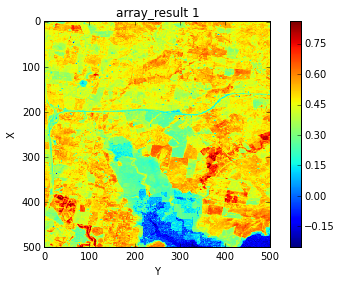

In [5]:
result = e.executePlan(a.plan)
plot(e.cache['medianT'])